In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 애플고딕폰트를 사용하도록 설정
plt.rc('font', family='AppleGothic')

In [14]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [15]:
df_train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [17]:
# '대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급'은 각각 라벨인코딩이 필요하다.
from sklearn.preprocessing import LabelEncoder

# 라벨인코딩을 위한 함수 정의
def label_encoding(df, column):
    encoder = LabelEncoder()
    encoder.fit(df[column])
    df[column] = encoder.transform(df[column])
    return df

# 라벨인코딩 적용
columns_to_label_encoding = ['대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급']
for column in columns_to_label_encoding:
    df_train = label_encoding(df_train, column)
    df_test = label_encoding(df_test, column)

# 라벨인코딩 후 데이터프레임 출력
df_train

KeyError: '대출등급'

/var/folders/vm/5qmxs2qx4jqfzfp5dmt_3x900000gn/T/ipykernel_35731/2109328349.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
/Users/being/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/being/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


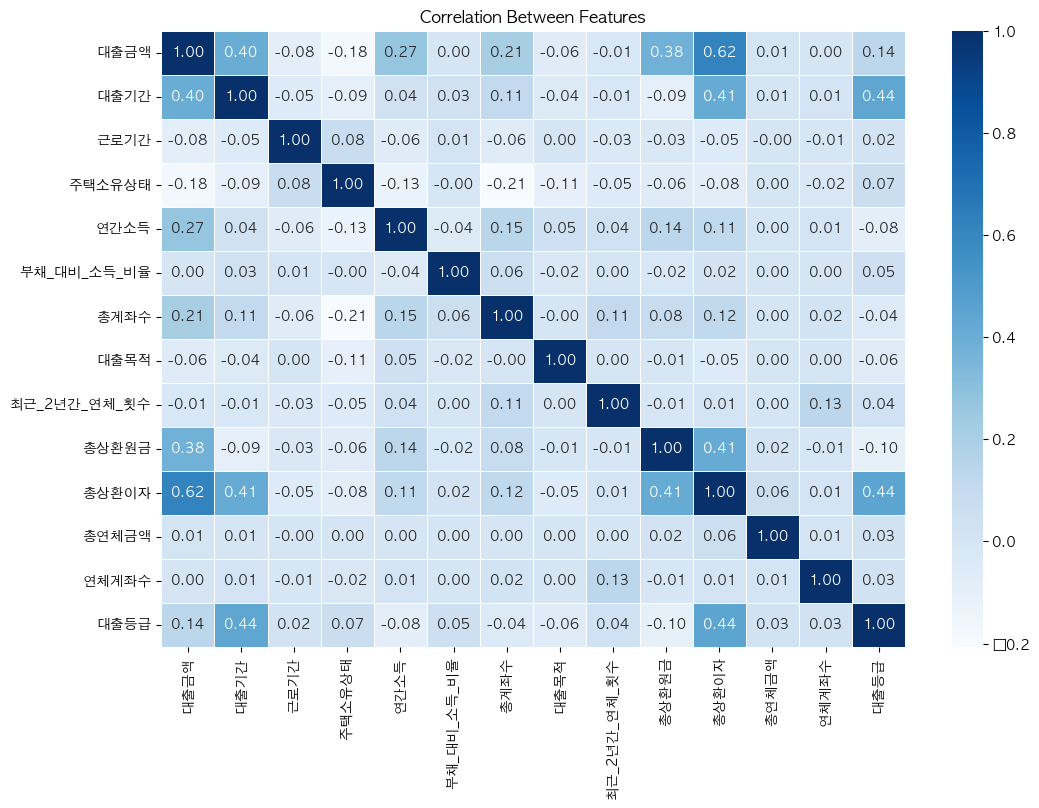

In [18]:
# 히트맵으로 상관관계 확인
plt.figure(figsize=(12, 8))
sns.heatmap(data=df_train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation Between Features')
plt.show()

In [19]:
df_train.to_csv('../data/train_preprocessed.csv', index=False)
df_test.to_csv('../data/test_preprocessed.csv', index=False)

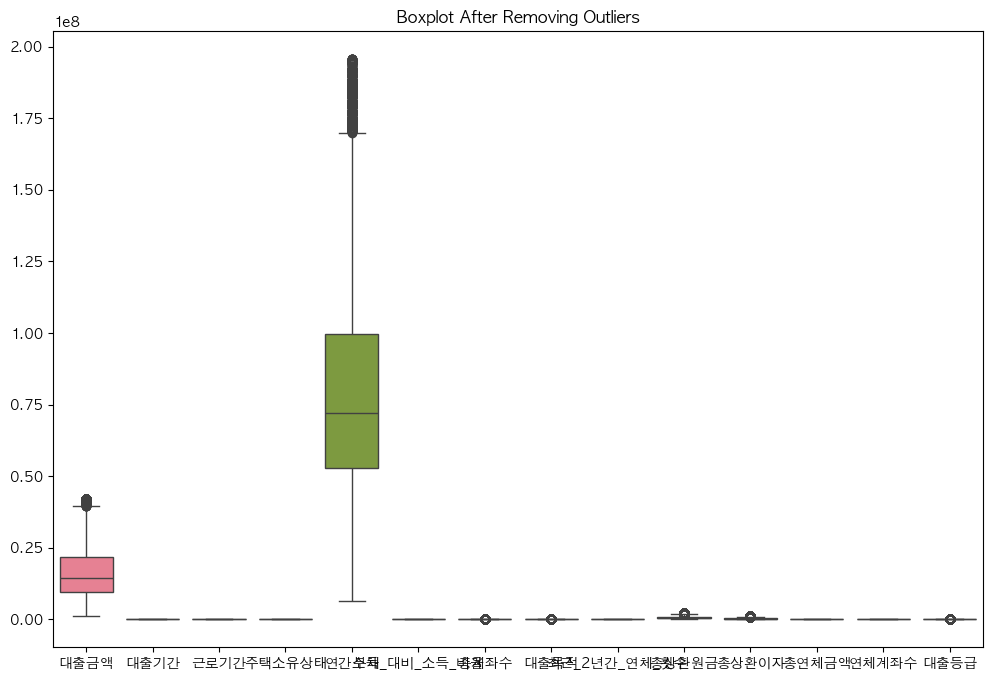

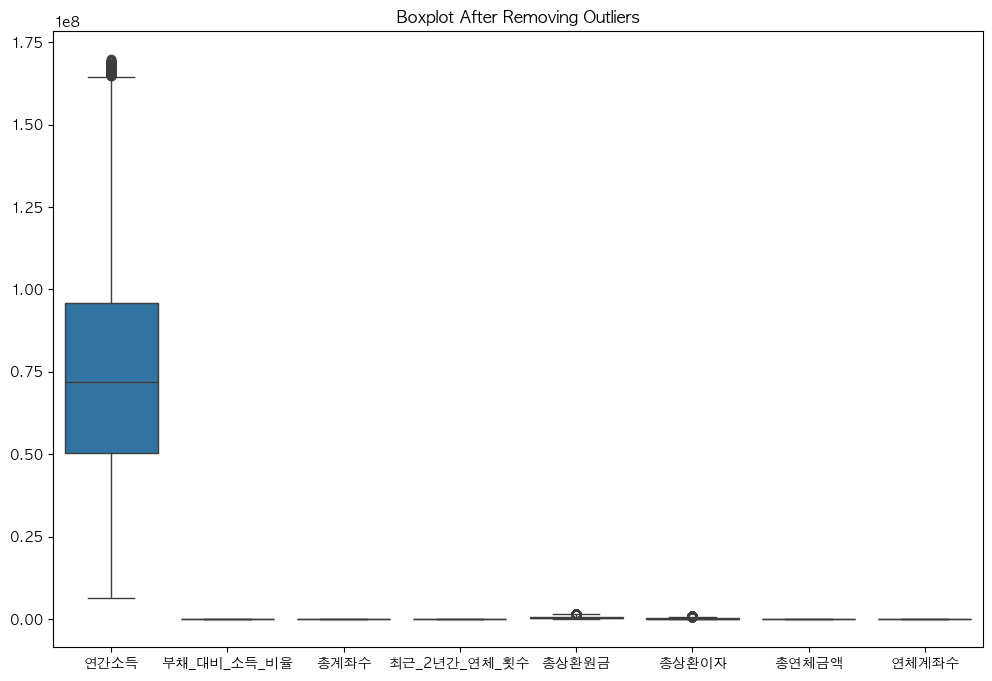

                ID      대출금액  대출기간  근로기간  주택소유상태       연간소득  부채_대비_소득_비율  \
0      TRAIN_00000  12480000     0     9       3   72000000        18.90   
1      TRAIN_00001  14400000     1     2       1  130800000        22.33   
2      TRAIN_00002  12000000     0     8       1   96000000         8.60   
3      TRAIN_00003  14400000     0    11       1  132000000        15.09   
4      TRAIN_00004  18000000     1    15       3   71736000        25.39   
...            ...       ...   ...   ...     ...        ...          ...   
96285  TRAIN_96285  18000000     0    10       3   75600000        17.12   
96287  TRAIN_96287  12000000     0     2       1  132000000        11.61   
96290  TRAIN_96290  28800000     1     2       1  132000000         5.16   
96291  TRAIN_96291  14400000     0     0       1   84000000        11.24   
96293  TRAIN_96293   8640000     0     2       3   50400000        11.80   

       총계좌수  대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  연체계좌수  대출등급  
0        15   

/var/folders/vm/5qmxs2qx4jqfzfp5dmt_3x900000gn/T/ipykernel_35731/1853193721.py:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
/Users/being/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/being/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


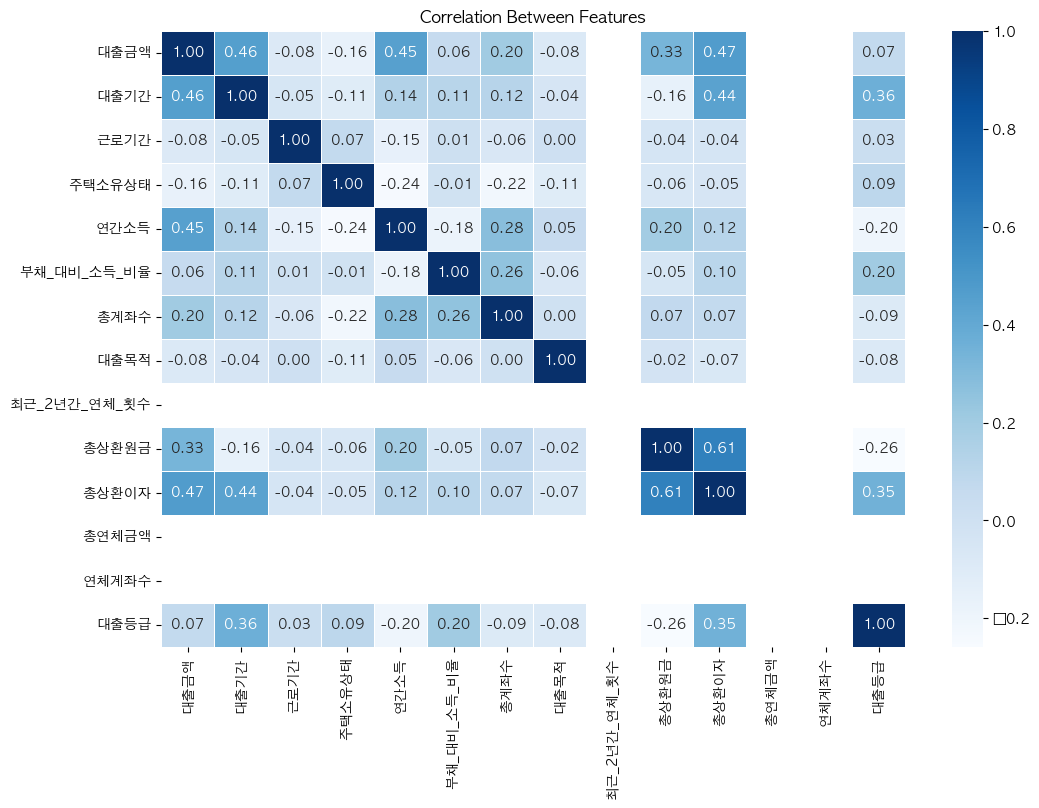

In [11]:
# 이상치 제거 (연간소득, 부채_대비_소득_비율, 총계좌수, 최근_2년간_연체_횟수, 총상환원금, 총상환이자, 총연체금액, 연체계좌수)
# threshold는 박스플롯의 1.5배수를 기준으로 한다.

# 이상치 제거를 위한 함수 정의
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# 박스플롯으로 이상치 제거 전 데이터 확인
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train)
plt.title('Boxplot After Removing Outliers')
plt.show()

# 이상치 제거 적용
columns_to_remove_outliers = ['연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']
for column in columns_to_remove_outliers:
    df_train = remove_outliers(df_train, column)

# 박스플롯으로 이상치 제거 후 데이터 확인
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train[columns_to_remove_outliers])
plt.title('Boxplot After Removing Outliers')
plt.show()

# 이상치 제거 후 데이터프레임 출력
print(df_train)

# 히트맵으로 상관관계 확인
plt.figure(figsize=(12, 8))
sns.heatmap(data=df_train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation Between Features')
plt.show()


In [12]:
df_train.to_csv('../data/train_preprocessed_delateOUT.csv', index=False)